Equilibrium values (analytical):
  O* = 5000.00
  T* = 5000.00

Last simulated values (for comparison):
  O_last = 5000.00
  T_last = 5000.00


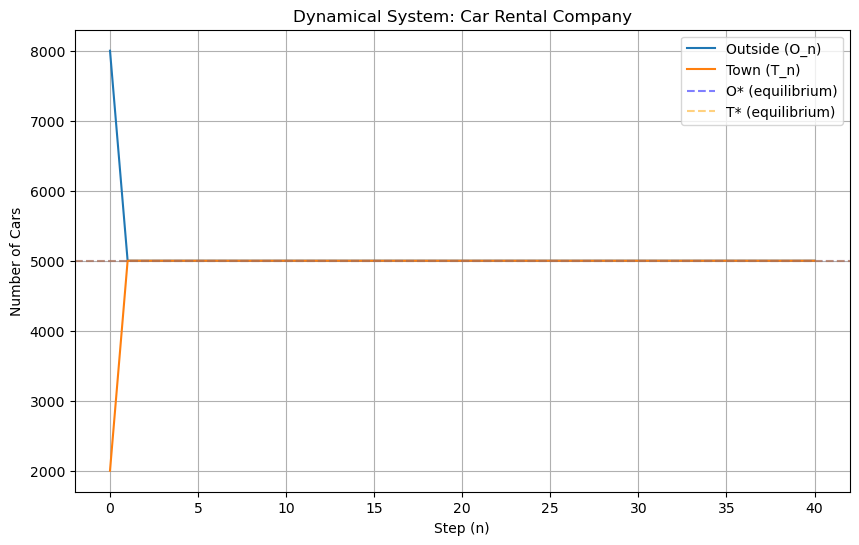

In [ ]:
# Car Rental Company Dynamical System Simulation

import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters ----
# You can change these to experiment!
k1 = 0.5   # Coefficient for O_n in O_n+1 equation
k2 = 0.5  # Coefficient for T_n in O_n+1 equation
k3 = 0.5   # Coefficient for O_n in T_n+1 equation
k4 = 0.5   # Coefficient for T_n in T_n+1 equation

total_cars = 10000

# Initial values (you can change O_0, T_0 as long as they sum to total_cars)
O_0 = 8000
T_0 = total_cars - O_0

n_steps = 40

# ---- Dynamical System Simulation ----
O = [O_0]
T = [T_0]

for _ in range(n_steps):
    O_next = k1 * O[-1] + k2 * T[-1]
    T_next = k3 * O[-1] + k4 * T[-1]
    O.append(O_next)
    T.append(T_next)

# ---- Analytical Equilibrium Calculation ----
# At equilibrium: O_n+1 = O_n = O*, T_n+1 = T_n = T*
# So: O* = k1*O* + k2*T*, T* = k3*O* + k4*T*
# Also: O* + T* = total_cars

# Solve:
A = np.array([[1 - k1, -k2], [1, 1]])
b = np.array([0, total_cars])

# From 1st equation: (1 - k1)O* - k2*T* = 0 --> (1 - k1)O* = k2*T*
# So: O* = (k2/(1-k1)) * T*
# Use total: O* + T* = total_cars --> ((k2/(1-k1)) * T*) + T* = total_cars
# --> T* * (1 + k2/(1-k1)) = total_cars
# --> T* = total_cars / (1 + k2/(1-k1)) = total_cars * (1-k1) / (1-k1+k2)
# --> O* = total_cars - T*

# But let's use numpy for generality:
M = np.array([[1 - k1, -k2], [1, 1]])
rhs = np.array([0, total_cars])
O_star, T_star = np.linalg.solve(M, rhs)

print("Equilibrium values (analytical):")
print(f"  O* = {O_star:.2f}")
print(f"  T* = {T_star:.2f}")

print("\nLast simulated values (for comparison):")
print(f"  O_last = {O[-1]:.2f}")
print(f"  T_last = {T[-1]:.2f}")

# ---- Plotting ----
plt.figure(figsize=(10,6))
plt.plot(O, label='Outside (O_n)')
plt.plot(T, label='Town (T_n)')
plt.axhline(O_star, color='blue', linestyle='--', alpha=0.5, label='O* (equilibrium)')
plt.axhline(T_star, color='orange', linestyle='--', alpha=0.5, label='T* (equilibrium)')
plt.title('Dynamical System: Car Rental Company')
plt.xlabel('Step (n)')
plt.ylabel('Number of Cars')
plt.legend()
plt.grid(True)
plt.show()
# ---- End of Simulation ----

In [9]:
import pandas as pd
import numpy as np
# Head-on Battle Simulation
# Parameters for the head-on battle
B_init = 27   # British ships
F_init = 33    # S-F ships

print("\n==== Head-on Battle ====")
rows = []
B_n, F_n = B_init, F_init
n = 0
while True:
    rows.append({'n': n, 'British': B_n, 'S-F': F_n})
    B_next = B_n - 0.05 * F_n
    F_next = F_n - 0.15 * B_n
    # Stop if either next value would be negative
    if B_next < 0 or F_next < 0:
        break
    B_n, F_n = B_next, F_next
    n += 1

df = pd.DataFrame(rows)
df['British_rounded'] = np.round(df['British'], 2)
df['S-F_rounded'] = np.round(df['S-F'], 2)
display(df)


def simulate_battle(B_init, F_init, battle_name="Battle"):
    rows = []
    B_n, F_n = B_init, F_init
    n = 0
    while True:
        rows.append({'n': n, 'British': B_n, 'S-F': F_n})
        B_next = B_n - 0.05 * F_n
        F_next = F_n - 0.15 * B_n

        # Stop if the next value would be negative
        if B_next < 0 or F_next < 0:
            break
        B_n, F_n = B_next, F_next
        n += 1

    df = pd.DataFrame(rows)
    df['British_rounded'] = np.round(df['British'], 2)
    df['S-F_rounded'] = np.round(df['S-F'], 2)
    print(f"\n==== {battle_name} ====")
    display(df)
    # Return remaining ships, never negative
    return max(0, B_n), max(0, F_n)

# Battle A
B_init_A = 13
F_init_A = 3
B_remain_A, F_remain_A = simulate_battle(B_init_A, F_init_A, battle_name="Battle A")

# Battle B
B_init_B = (27 - 13) + B_remain_A  # 14 + survivors from A
F_init_B = 17 + F_remain_A         # 17 + survivors from A
B_remain_B, F_remain_B = simulate_battle(B_init_B, F_init_B, battle_name="Battle B")

# Battle C
B_init_C = B_remain_B
F_init_C = F_remain_B
B_remain_C, F_remain_C = simulate_battle(B_init_C, F_init_C, battle_name="Battle C")



==== Head-on Battle ====


,n,British,S-F,British_rounded,S-F_rounded
0,0,27.000000,33.000000,27.00,33.00
1,1,25.350000,28.950000,25.35,28.95
2,2,23.902500,25.147500,23.90,25.15
3,3,22.645125,21.562125,22.65,21.56
4,4,21.567019,18.165356,21.57,18.17
5,5,20.658751,14.930303,20.66,14.93
6,6,19.912236,11.831491,19.91,11.83
7,7,19.320661,8.844655,19.32,8.84
8,8,18.878428,5.946556,18.88,5.95
9,9,18.581101,3.114792,18.58,3.11



==== Battle A ====


,n,British,S-F,British_rounded,S-F_rounded
0,0,13.00,3.00,13.00,3.00
1,1,12.85,1.05,12.85,1.05



==== Battle B ====


,n,British,S-F,British_rounded,S-F_rounded
0,0,26.850000,18.050000,26.85,18.05
1,1,25.947500,14.022500,25.95,14.02
2,2,25.246375,10.130375,25.25,10.13
3,3,24.739856,6.343419,24.74,6.34
4,4,24.422685,2.632440,24.42,2.63



==== Battle C ====


,n,British,S-F,British_rounded,S-F_rounded
0,0,24.422685,2.63244,24.42,2.63


==== Equilibrium Values (for all cases) ====
O* (Owls) = 1500.000, H* (Hawks) = 2000.000


==== Case 1 ====
k1=0.2, k2=0.3, k3=0.0001, k4=0.0002, O_0=1499.9999999999998, H_0=2000.0


,n,Owls,Hawks
0,0,1500.0,2000.0
1,1,1500.0,2000.0
2,2,1500.0,2000.0
3,3,1500.0,2000.0
4,4,1500.0,2000.0
...,...,...,...
995,995,1500.0,2000.0
996,996,1500.0,2000.0
997,997,1500.0,2000.0
998,998,1500.0,2000.0


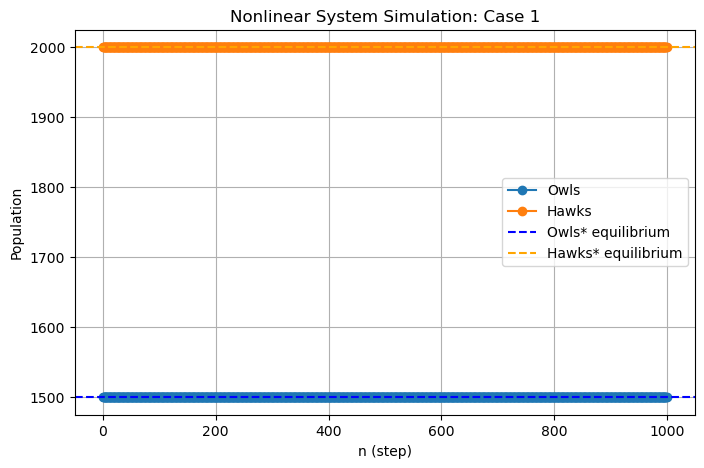


==== Case 2 ====
k1=0.2, k2=0.3, k3=0.0001, k4=0.0002, O_0=1498.9999999999998, H_0=2001.0


,n,Owls,Hawks
0,0,1499.000,2001.000
1,1,1498.850,2001.400
2,2,1498.640,2001.860
3,3,1498.361,2002.405
4,4,1498.001,2003.061
5,5,1497.543,2003.862
6,6,1496.964,2004.847
7,7,1496.239,2006.064
8,8,1495.331,2007.573
9,9,1494.199,2009.448


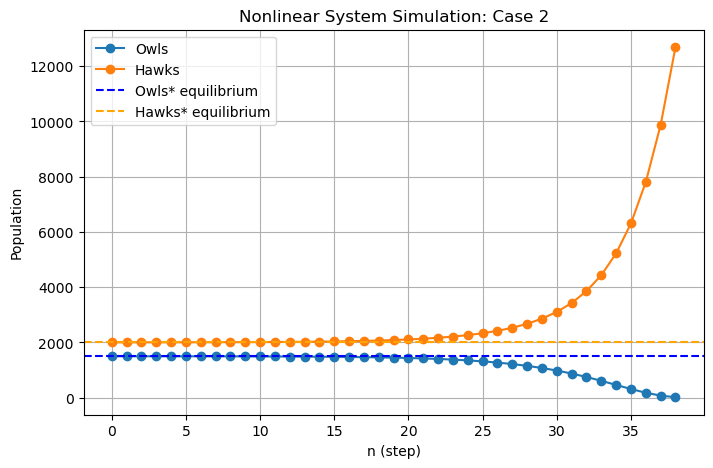


==== Case 3 ====
k1=0.2, k2=0.3, k3=0.0001, k4=0.0002, O_0=1500.9999999999998, H_0=1999.0


,n,Owls,Hawks
0,0,1501.000,1999.000
1,1,1501.150,1998.600
2,2,1501.360,1998.140
3,3,1501.639,1997.597
4,4,1502.000,1996.942
5,5,1502.460,1996.143
6,6,1503.039,1995.161
7,7,1503.766,1993.948
8,8,1504.676,1992.446
9,9,1505.813,1990.583


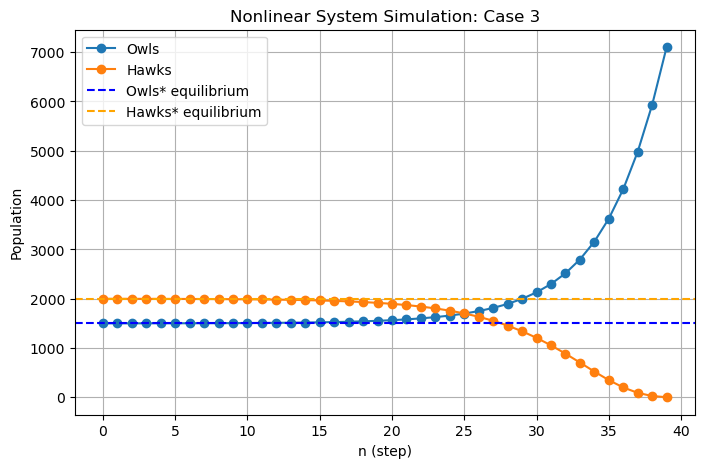


==== Case 4 ====
k1=0.2, k2=0.3, k3=0.0001, k4=0.0002, O_0=10, H_0=10


,n,Owls,Hawks
0,0,10.000,10.000
1,1,11.990,12.980
2,2,14.372,16.843
3,3,17.223,21.847
4,4,20.630,28.326
5,5,24.697,36.707
6,6,29.546,47.538
7,7,35.315,61.519
8,8,42.160,79.540
9,9,50.257,102.731


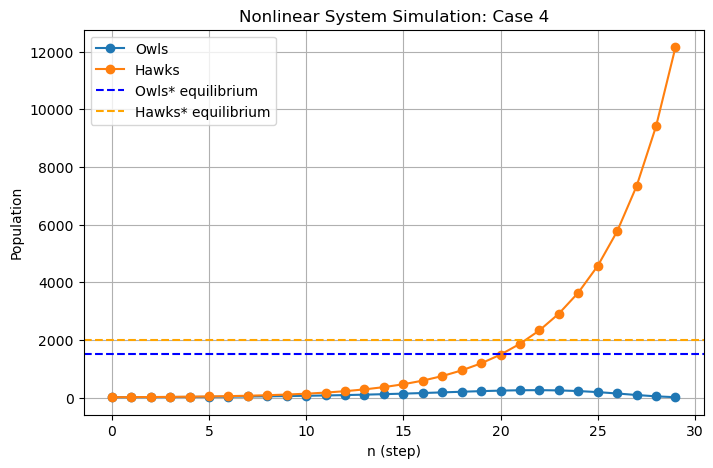

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Set global parameters ===
k1 = 0.2
k2 = 0.3
k3 = 0.0001
k4 = 0.0002

# === Calculate equilibrium values ===
O_star = k2 / k4 if k4 != 0 else float('inf')
H_star = k1 / k3 if k3 != 0 else float('inf')

print("==== Equilibrium Values (for all cases) ====")
print(f"O* (Owls) = {O_star:.3f}, H* (Hawks) = {H_star:.3f}\n")

# === Editable initial conditions (use O_star/H_star directly if desired) ===
O_0_list = [O_star, O_star-1, O_star+1, 10]
H_0_list = [H_star, H_star+1, H_star-1, 10]

threshold = 0.01  # Stop when either drops below this value

# === Simulate for each initial condition set ===
for i, (O_0, H_0) in enumerate(zip(O_0_list, H_0_list)):
    print(f"\n==== Case {i+1} ====")
    print(f"k1={k1}, k2={k2}, k3={k3}, k4={k4}, O_0={O_0}, H_0={H_0}")

    # Simulate
    rows = []
    O_n, H_n = O_0, H_0
    n = 0
    while O_n > threshold and H_n > threshold and n < 1000:
        rows.append({'n': n, 'Owls': np.round(O_n, 3), 'Hawks': np.round(H_n, 3)})
        O_next = (1 + k1) * O_n - k3 * O_n * H_n
        H_next = (1 + k2) * H_n - k4 * O_n * H_n
        O_n, H_n = O_next, H_next
        n += 1

    df = pd.DataFrame(rows)
    display(df)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df['n'], df['Owls'], label='Owls', marker='o')
    plt.plot(df['n'], df['Hawks'], label='Hawks', marker='o')
    plt.axhline(O_star, color='blue', linestyle='--', label='Owls* equilibrium')
    plt.axhline(H_star, color='orange', linestyle='--', label='Hawks* equilibrium')
    plt.xlabel('n (step)')
    plt.ylabel('Population')
    plt.title(f'Nonlinear System Simulation: Case {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

==== Equilibrium Values (for all cases) ====
Owls* = 150.000, Mice* = 200.000


==== Case 1 ====
k1=0.2, k2=-0.3, k3=0.001, k4=-0.002, Owls_0=150, Mice_0=200


,n,Owls,Mice
0,0,150.0,200.0
1,1,150.0,200.0
2,2,150.0,200.0
3,3,150.0,200.0
4,4,150.0,200.0
...,...,...,...
995,995,150.0,200.0
996,996,150.0,200.0
997,997,150.0,200.0
998,998,150.0,200.0


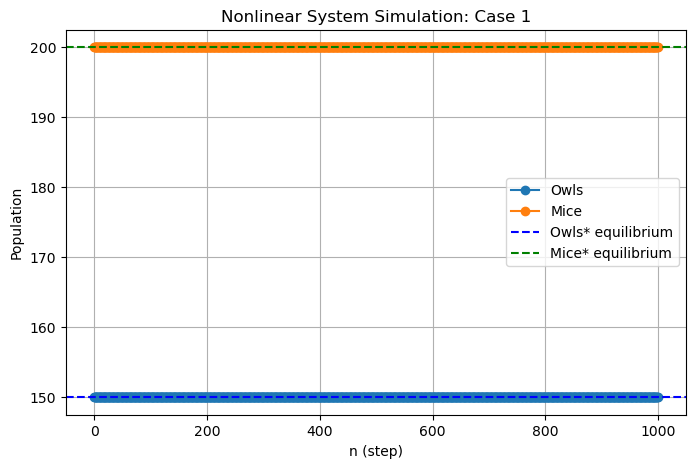


==== Case 2 ====
k1=0.2, k2=-0.3, k3=0.001, k4=-0.002, Owls_0=150, Mice_0=300


,n,Owls,Mice
0,0,150.000,300.000
1,1,135.000,300.000
2,2,121.500,291.000
3,3,110.443,274.413
4,4,102.225,252.703
...,...,...,...
99,99,1137.207,11.235
100,100,1351.872,33.418
101,101,1577.069,113.747
102,102,1713.097,438.397


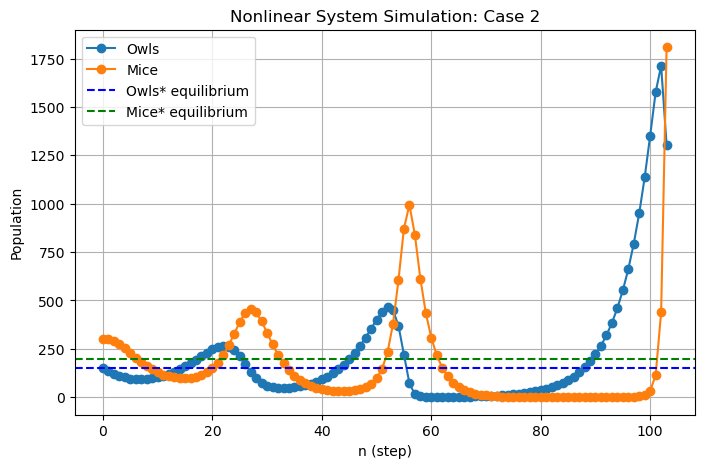


==== Case 3 ====
k1=0.2, k2=-0.3, k3=0.001, k4=-0.002, Owls_0=100, Mice_0=200


,n,Owls,Mice
0,0,100.000,200.000
1,1,100.000,180.000
2,2,102.000,162.000
3,3,105.876,146.448
4,4,111.546,133.524
...,...,...,...
84,84,849.788,26.286
85,85,997.408,63.075
86,86,1133.977,169.976
87,87,1168.023,504.482


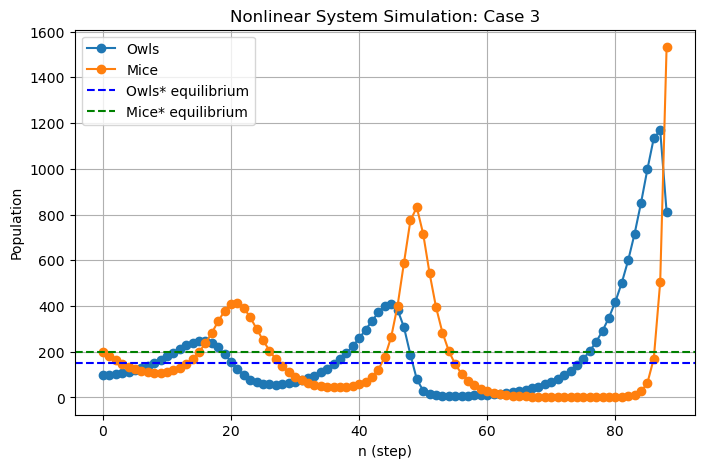


==== Case 4 ====
k1=0.2, k2=-0.3, k3=0.001, k4=-0.002, Owls_0=10, Mice_0=20


,n,Owls,Mice
0,0,10.000,20.000
1,1,11.800,14.400
2,2,13.990,10.420
3,3,16.642,7.585
4,4,19.845,5.562
5,5,23.703,4.114
6,6,28.346,3.075
7,7,33.928,2.327
8,8,40.635,1.787
9,9,48.689,1.396


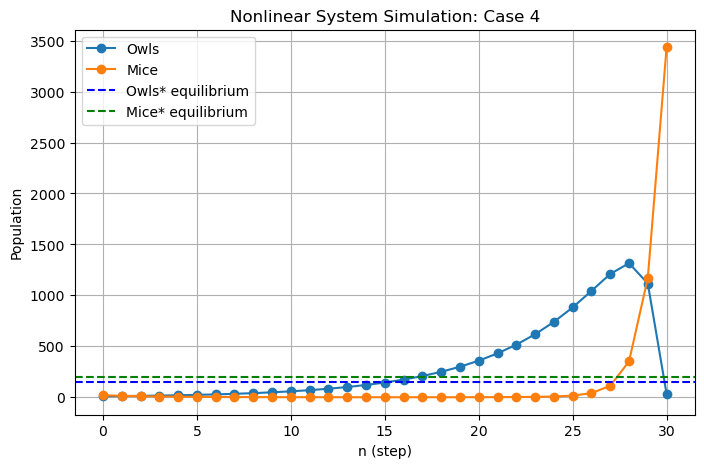

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Set global parameters ===
k1 = 0.2
k2 = -0.3
k3 = 0.001
k4 = -0.002

# === Calculate equilibrium values ===
O_star = k2 / k4 if k4 != 0 else float('inf')
M_star = k1 / k3 if k3 != 0 else float('inf')

print("==== Equilibrium Values (for all cases) ====")
print(f"Owls* = {O_star:.3f}, Mice* = {M_star:.3f}\n")

# === Editable initial conditions ===
O_0_list = [150, 150, 100, 10]
M_0_list = [200,300,200,20]

threshold = 0.01  # Stop when either drops below this value

# === Simulate for each initial condition set ===
for i, (O_0, M_0) in enumerate(zip(O_0_list, M_0_list)):
    print(f"\n==== Case {i+1} ====")
    print(f"k1={k1}, k2={k2}, k3={k3}, k4={k4}, Owls_0={O_0}, Mice_0={M_0}")

    # Simulate
    rows = []
    O_n, M_n = O_0, M_0
    n = 0
    while O_n > threshold and M_n > threshold and n < 1000:
        rows.append({'n': n, 'Owls': np.round(O_n, 3), 'Mice': np.round(M_n, 3)})
        O_next = (1 + k1) * O_n - k3 * O_n * M_n
        M_next = (1 + k2) * M_n - k4 * O_n * M_n
        O_n, M_n = O_next, M_next
        n += 1

    df = pd.DataFrame(rows)
    display(df)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df['n'], df['Owls'], label='Owls', marker='o')
    plt.plot(df['n'], df['Mice'], label='Mice', marker='o')
    plt.axhline(O_star, color='blue', linestyle='--', label='Owls* equilibrium')
    plt.axhline(M_star, color='green', linestyle='--', label='Mice* equilibrium')
    plt.xlabel('n (step)')
    plt.ylabel('Population')
    plt.title(f'Nonlinear System Simulation: Case {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


==== Initial Equilibrium Values (for total travelers = 4000) ====
Southwest* = 2222.222, United* = 777.778, American* = 1000.000



==== Case 1 ====
S_1=0.75, U_1=0.2, A_1=0.4, S_2=0.05, U_2=0.6, A_2=0.2, S_3=0.2, U_3=0.2, A_3=0.4
Southwest_0=2222, United_0=778, American_0=1000


,n,Southwest,United,American,Total Travelers,Southwest_eq,United_eq,American_eq
0,0,2222.000,778.000,1000.0,4000.0,2222.222,777.778,1000.0
1,1,2333.200,816.800,1050.0,4200.0,2333.333,816.667,1050.0
2,2,2444.365,855.635,1100.0,4400.0,2444.444,855.556,1100.0
3,3,2555.508,894.492,1150.0,4600.0,2555.556,894.444,1150.0
4,4,2666.639,933.361,1200.0,4800.0,2666.667,933.333,1200.0
5,5,2777.761,972.239,1250.0,5000.0,2777.778,972.222,1250.0
6,6,2888.879,1011.121,1300.0,5200.0,2888.889,1011.111,1300.0
7,7,2999.994,1050.006,1350.0,5400.0,3000.000,1050.000,1350.0
8,8,3111.108,1088.892,1400.0,5600.0,3111.111,1088.889,1400.0
9,9,3222.220,1127.780,1450.0,5800.0,3222.222,1127.778,1450.0


Stopped at n=21 (either max_iter reached or a population < 0).


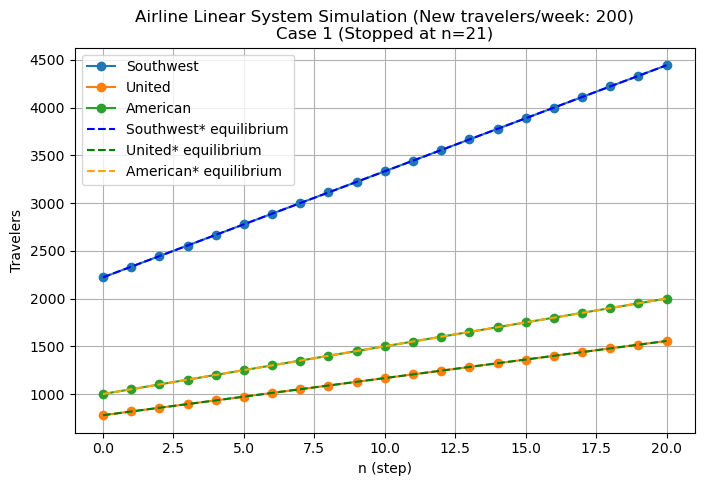


==== Case 2 ====
S_1=0.75, U_1=0.2, A_1=0.4, S_2=0.05, U_2=0.6, A_2=0.2, S_3=0.2, U_3=0.2, A_3=0.4
Southwest_0=2272, United_0=828, American_0=900


,n,Southwest,United,American,Total Travelers,Southwest_eq,United_eq,American_eq
0,0,2272.000,828.000,900.000,4000.0,2222.222,777.778,1000.0
1,1,2343.200,831.800,1025.000,4200.0,2333.333,816.667,1050.0
2,2,2445.341,860.850,1093.810,4400.0,2444.444,855.556,1100.0
3,3,2554.851,896.668,1148.481,4600.0,2555.556,894.444,1150.0
4,4,2665.945,934.425,1199.630,4800.0,2666.667,933.333,1200.0
5,5,2777.277,972.813,1249.911,5000.0,2777.778,972.222,1250.0
6,6,2888.575,1011.446,1299.979,5200.0,2888.889,1011.111,1300.0
7,7,2999.811,1050.194,1349.995,5400.0,3000.000,1050.000,1350.0
8,8,3110.999,1089.002,1399.999,5600.0,3111.111,1088.889,1400.0
9,9,3222.156,1127.844,1450.000,5800.0,3222.222,1127.778,1450.0


Stopped at n=21 (either max_iter reached or a population < 0).


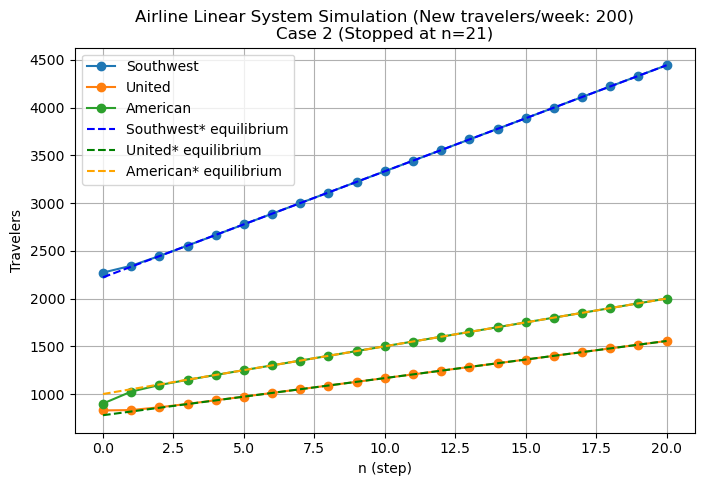


==== Case 3 ====
S_1=0.75, U_1=0.2, A_1=0.4, S_2=0.05, U_2=0.6, A_2=0.2, S_3=0.2, U_3=0.2, A_3=0.4
Southwest_0=0, United_0=0, American_0=4000


,n,Southwest,United,American,Total Travelers,Southwest_eq,United_eq,American_eq
0,0,0.000,0.000,4000.000,4000.0,2222.222,777.778,1000.0
1,1,1600.000,800.000,1800.000,4200.0,2333.333,816.667,1050.0
2,2,2156.190,958.095,1285.714,4400.0,2444.444,855.556,1100.0
3,3,2421.056,983.359,1195.584,4600.0,2555.556,894.444,1150.0
4,4,2595.961,992.940,1211.099,4800.0,2666.667,933.333,1200.0
5,5,2738.163,1009.154,1252.682,5000.0,2777.778,972.222,1250.0
6,6,2866.053,1033.303,1300.644,5200.0,2888.889,1011.111,1300.0
7,7,2986.691,1063.156,1350.154,5400.0,3000.000,1050.000,1350.0
8,8,3103.329,1096.635,1400.036,5600.0,3111.111,1088.889,1400.0
9,9,3217.671,1132.320,1450.009,5800.0,3222.222,1127.778,1450.0


Stopped at n=21 (either max_iter reached or a population < 0).


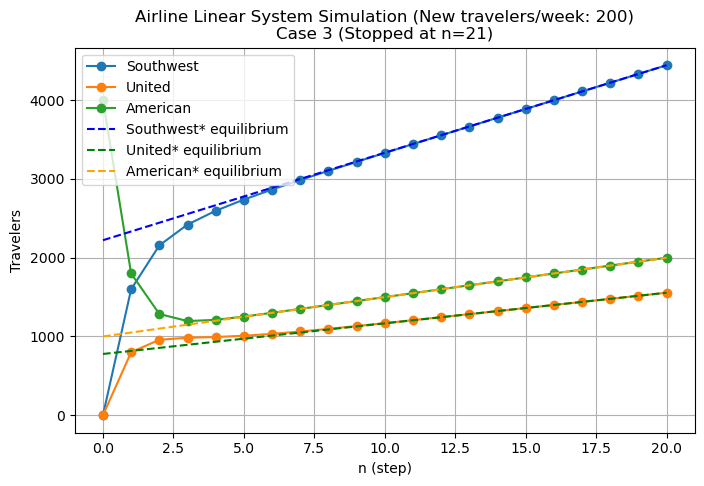

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Constants (edit as needed) ===
S_1, U_1, A_1 = 0.75, 0.2, 0.4
S_2, U_2, A_2 = 0.05, 0.6, 0.2
S_3, U_3, A_3 = 0.2, 0.2, 0.4

initial_total_travelers = 4000  # Initial sum of equilibrium values
tolerance = 0.01 * initial_total_travelers  # 1% of initial total_travelers
max_iter = 20  # Maximum number of iterations

new_travelers_per_week = 200  # Number of new travelers added each iteration (week)

# === Initial conditions (editable arrays) ===
Southwest_0_list = [2222, 2272, 0]
United_0_list = [778, 828, 0]
American_0_list = [1000, 900, 4000]

# === Build transition matrix ===
M = np.array([
    [S_1, U_1, A_1],
    [S_2, U_2, A_2],
    [S_3, U_3, A_3]
])

def compute_equilibrium(total_travelers):
    eigvals, eigvecs = np.linalg.eig(M)
    idx = np.argmin(np.abs(eigvals - 1))
    equilibrium_raw = np.real(eigvecs[:, idx])
    if np.sum(equilibrium_raw < 0) > len(equilibrium_raw) / 2:
        equilibrium_raw = -equilibrium_raw
    equilibrium_normalized = equilibrium_raw / np.sum(equilibrium_raw) * total_travelers
    return equilibrium_normalized

initial_equilibrium = compute_equilibrium(initial_total_travelers)

print("==== Initial Equilibrium Values (for total travelers = {}) ====".format(initial_total_travelers))
print("Southwest* = {:.3f}, United* = {:.3f}, American* = {:.3f}".format(
    initial_equilibrium[0], initial_equilibrium[1], initial_equilibrium[2]
))
print("\n")

# === Simulate for each initial condition set ===
for i, (Southwest_0, United_0, American_0) in enumerate(zip(Southwest_0_list, United_0_list, American_0_list)):
    print(f"\n==== Case {i+1} ====")
    print(f"S_1={S_1}, U_1={U_1}, A_1={A_1}, S_2={S_2}, U_2={U_2}, A_2={A_2}, S_3={S_3}, U_3={U_3}, A_3={A_3}")
    print(f"Southwest_0={Southwest_0}, United_0={United_0}, American_0={American_0}")

    # Simulate
    rows = []
    Southwest_n, United_n, American_n = Southwest_0, United_0, American_0
    n = 0
    total_travelers = Southwest_n + United_n + American_n

    equilibrium_this_run = [compute_equilibrium(total_travelers)]  # store equilibrium at each step

    while n <= max_iter:
        rows.append({
            'n': n,
            'Southwest': np.round(Southwest_n, 3),
            'United': np.round(United_n, 3),
            'American': np.round(American_n, 3),
            'Total Travelers': np.round(total_travelers, 3)
        })
        # Stop if any drop below zero
        if (Southwest_n < 0 or United_n < 0 or American_n < 0):
            break

        # Proportionally allocate new travelers
        proportions = np.array([Southwest_n, United_n, American_n]) / total_travelers if total_travelers > 0 else np.array([1/3, 1/3, 1/3])
        new_arrivals = proportions * new_travelers_per_week

        # Calculate next populations
        Southwest_next = S_1 * Southwest_n + U_1 * United_n + A_1 * American_n + new_arrivals[0]
        United_next = S_2 * Southwest_n + U_2 * United_n + A_2 * American_n + new_arrivals[1]
        American_next = S_3 * Southwest_n + U_3 * United_n + A_3 * American_n + new_arrivals[2]
        Southwest_n, United_n, American_n = Southwest_next, United_next, American_next

        total_travelers = Southwest_n + United_n + American_n
        equilibrium_this_run.append(compute_equilibrium(total_travelers))

        n += 1

    df = pd.DataFrame(rows)

    # Add recalculated equilibrium values to the main table
    eq_arr = np.array(equilibrium_this_run[:len(df)])  # match df length if stopped early
    df['Southwest_eq'] = np.round(eq_arr[:, 0], 3)
    df['United_eq'] = np.round(eq_arr[:, 1], 3)
    df['American_eq'] = np.round(eq_arr[:, 2], 3)

    display(df)
    print(f"Stopped at n={n} (either max_iter reached or a population < 0).")

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df['n'], df['Southwest'], label='Southwest', marker='o')
    plt.plot(df['n'], df['United'], label='United', marker='o')
    plt.plot(df['n'], df['American'], label='American', marker='o')
    plt.plot(df['n'], df['Southwest_eq'], color='blue', linestyle='--', label='Southwest* equilibrium')
    plt.plot(df['n'], df['United_eq'], color='green', linestyle='--', label='United* equilibrium')
    plt.plot(df['n'], df['American_eq'], color='orange', linestyle='--', label='American* equilibrium')
    plt.xlabel('n (step)')
    plt.ylabel('Travelers')
    plt.title(f'Airline Linear System Simulation (New travelers/week: {new_travelers_per_week})\nCase {i+1} (Stopped at n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()
